<a href="https://colab.research.google.com/github/zugbaa/RUSU_projekt_email_spam_filter/blob/main/Email_spam_filter_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U tensorflow
!pip install -U tensorflow-text
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/My Drive/spam.csv")

df = df[['Body', 'Label']]

print(df)

                                                   Body  Label
0     Subject: stock promo mover : cwtd\n * * * urge...      1
1     Subject: are you listed in major search engine...      1
2     Subject: important information thu , 30 jun 20...      1
3     Subject: = ? utf - 8 ? q ? bask your life with...      1
4     Subject: " bidstogo " is places to go , things...      1
...                                                 ...    ...
1995  Subject: it ' s cheating , but it works !\n ca...      1
1996  Subject: gracious moms from this site are the ...      1
1997  Subject: i didn ' t waitt any longer\n hello ,...      1
1998  Subject: get the most out of your computer !\n...      1
1999  Subject: she looks good\n click here to be rem...      1

[2000 rows x 2 columns]
                                                   Body  Label
2000  Subject: re : legislative report ( 07 / 20 / 2...      0
2001  Subject: re : video conference with ross mcint...      0
2002  Subject: intern compensa

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Body'], df['Label'], stratify=df['Label'])

In [ ]:
bert_preprocess = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

In [ ]:
#Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name="text")
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

#Neural network layers
l = tf.keras.layers.Dropout(0.15, name='dropout')(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(l)

#Final model
model = tf.keras.Model(inputs=[text_input], outputs=[l])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [ ]:
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='Accuracy'),
    tf.keras.metrics.Precision(name='Precision'),
    tf.keras.metrics.Recall(name='Recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS
              )

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
94/94 [==============================] - 1459s 15s/step - loss: 0.6476 - Accuracy: 0.6307 - Precision: 0.6378 - Recall: 0.6047
Epoch 2/10
94/94 [==============================] - 1418s 15s/step - loss: 0.5745 - Accuracy: 0.7087 - Precision: 0.7101 - Recall: 0.7053
Epoch 3/10
94/94 [==============================] - 1438s 15s/step - loss: 0.5302 - Accuracy: 0.7623 - Precision: 0.7657 - Recall: 0.7560
Epoch 4/10
94/94 [==============================] - 1423s 15s/step - loss: 0.4945 - Accuracy: 0.7850 - Precision: 0.7902 - Recall: 0.7760
Epoch 5/10
94/94 [==============================] - 1427s 15s/step - loss: 0.4703 - Accuracy: 0.7970 - Precision: 0.8024 - Recall: 0.7880
Epoch 6/10
94/94 [==============================] - 1425s 15s/step - loss: 0.4437 - Accuracy: 0.8190 - Precision: 0.8235 - Recall: 0.8120
Epoch 7/10
94/94 [==============================] - 1424s 15s/step - loss: 0.4259 - Accuracy: 0.8293 - Precision: 0.8351 - Recall: 0.8207
Epoch 8/10
94/94 [================

In [ ]:
model.evaluate(X_test, y_test)

32/32 [==============================] - 477s 15s/step - loss: 0.3603 - Accuracy: 0.8760 - Precision: 0.9234 - Recall: 0.8200


[0.3602610230445862,
 0.8759999871253967,
 0.9234234094619751,
 0.8199999928474426]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

32/32 [==============================] - 473s 15s/step


In [ ]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)

print(y_predicted)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
print(cm)

Text(50.722222222222214, 0.5, 'truth')

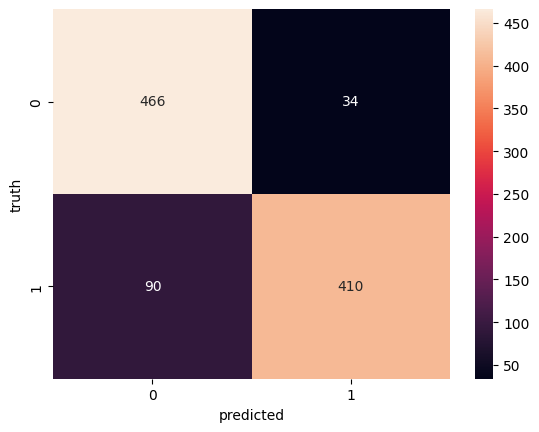

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn

sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       500
           1       0.92      0.82      0.87       500

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000

